In [25]:
import pandas as pd
import os

from glob import glob

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

DATA_DIR = "../data/fis/world_championships"


In [37]:
file_paths = [x for x in glob(DATA_DIR + "/*.csv")]
file_path = file_paths[10]
#pd.read_csv(file_path, encoding="utf-8")
def get_df(file_path):
    year, event_type, event, race = os.path.basename(file_path).split("|")
    year = int(year)
    race = race.replace(".csv", "")
    df = pd.read_csv(file_path, encoding="utf-8")
    df["event_type"] = event_type
    df["race"] = race
    df["year"] = year
    df["event"] = event
    return df

dfs = []
for file_path in file_paths:
    _df = get_df(file_path)
    dfs.append(_df)

df = pd.concat(dfs)
df.head()

/home/jens/.local/lib/python2.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Athlete   Bib Diff. Time  FIS Points FIS code                     Name  \
0     NaN   1.0    53:30.0         NaN    74599                   NORWAY   
1     NaN  10.0        NaN         NaN  1305426      SKOFTERUD Vibeke W.   
2     NaN  10.0        NaN         NaN  3425301           JOHAUG Therese   
3     NaN  10.0        NaN         NaN  3425003  STEIRA Kristin Stoermer   
4     NaN  10.0        NaN         NaN  1303777           BJOERGEN Marit   

  Nation  Order  Rank Time Tot. Time  Unnamed: 0  Year  \
0    NOR    NaN   1.0  NaN   53:30.0           0   NaN   
1    NaN    NaN   NaN  NaN       NaN           1  1980   
2    NaN    NaN   NaN  NaN       NaN           2  1988   
3    NaN    NaN   NaN  NaN       NaN           3  1981   
4    NaN    NaN   NaN  NaN       NaN           4  1980   

                       cup            date       event  \
0  World Ski Championships  March 03, 2011  Oslo (NOR)   
1  World Ski Championships  March 03, 2011  Oslo (NOR)   
2  World Ski Championships  March 03, 2011  Oslo (NOR)   
3  World Ski Championships  March 03, 2011  Oslo (NOR)   
4  World Ski Championships  March 03, 2011  Oslo (NOR)   

                event_type                  race  year  
0  World Ski Championships  Ladies' Rel 4x5 km M  2011  
1  World Ski Championships  Ladies' Rel 4x5 km M  2011  
2  World Ski Championships  Ladies' Rel 4x5 km M  2011  
3  World Ski Championships  Ladies' Rel 4x5 km M  2011  
4  World Ski Championships  Ladies' Rel 4x5 km M  2011

In [75]:
is_exclued = df["race"].str.contains("Rel") | df["race"].str.contains("Team") | df["race"].str.contains("Qual") 
included_event_types = ['World Ski Championships', 'Olympic Winter Games']
df = df[~is_exclued]
df = df[df["event_type"].isin(included_event_types)]
df = df.rename(columns={"Year": "year_of_birth"})
df["age"] = pd.to_numeric(df["year"] - df["year_of_birth"])
df["is_top_3"] = df["Rank"] <= 3
df["sex"] = df["race"].str.split("'").str[0]
df.head()

Athlete   Bib Diff. Time  FIS Points FIS code Name Nation  \
0   NORTHUG Petter Jr.  18.0        NaN         NaN  3420239  NaN    NOR   
1          HARVEY Alex   5.0        NaN         NaN  3100110  NaN    CAN   
2  HATTESTAD Ola Vigen   2.0        NaN         NaN  3420077  NaN    NOR   
3       KRIUKOV Nikita   1.0        NaN         NaN  3480436  NaN    RUS   
4  PELLEGRINO Federico  15.0        NaN         NaN  3290326  NaN    ITA   

   Order  Rank Time ...  year_of_birth                      cup  \
0    NaN   1.0  NaN ...           1986  World Ski Championships   
1    NaN   2.0  NaN ...           1988  World Ski Championships   
2    NaN   3.0  NaN ...           1982  World Ski Championships   
3    NaN   4.0  NaN ...           1985  World Ski Championships   
4    NaN   5.0  NaN ...           1990  World Ski Championships   

                date        event               event_type               race  \
0  February 19, 2015  Falun (SWE)  World Ski Championships  Men's SP  C Final   
1  February 19, 2015  Falun (SWE)  World Ski Championships  Men's SP  C Final   
2  February 19, 2015  Falun (SWE)  World Ski Championships  Men's SP  C Final   
3  February 19, 2015  Falun (SWE)  World Ski Championships  Men's SP  C Final   
4  February 19, 2015  Falun (SWE)  World Ski Championships  Men's SP  C Final   

   year   age  is_top_3  sex  
0  2015  29.0      True  Men  
1  2015  27.0      True  Men  
2  2015  33.0      True  Men  
3  2015  30.0     False  Men  
4  2015  25.0     False  Men  

[5 rows x 22 columns]

In [39]:
df.event_type.unique()

array(['World Ski Championships', 'World Cup', 'Olympic Winter Games',
       'FIS'], dtype=object)

In [79]:
df_medalist = df[df.is_top_3 & df["age"].notna() & (df["age"] > 0)][["year", "event", "race", "Athlete", "age", "Rank", "sex"]].sort_values("age")
df_medalist.head()


year                    event                     race  \
1  1974              Falun (SWE)            Ladies' 10 km   
2  2007            Sapporo (JPN)      Ladies' 30 km C Mst   
1  2007            Sapporo (JPN)            Men's 15 km F   
2  1972  Sapporo (OWG+WSC) (JPN)              Men's 15 km   
0  2001              Lahti (FIN)  Ladies' SP 1 km F Final   

                 Athlete   age  Rank     sex  
1  PETZOLD-BEYER Barbara  19.0   2.0  Ladies  
2         JOHAUG Therese  19.0   3.0  Ladies  
1      KARNEYENKA Leanid  20.0   2.0     Men  
2             FORMO Ivar  20.0   3.0     Men  
0         MANNINEN Pirjo  20.0   1.0  Ladies

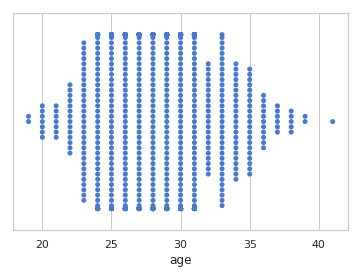

In [62]:
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

sns.swarmplot(x="age", hue="sex", data=df_medalist, dodge=True, )

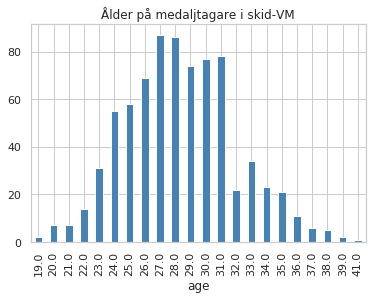

In [80]:
df_medalist.groupby("age").count()["sex"].plot.bar(color="steelblue", title=u"Ålder på medaljtagare i skid-VM")

In [91]:
df_medalist.set_index("Athlete")[["year", "race", "age", "Rank"]].head(20)

year                     race   age  Rank
Athlete                                                            
PETZOLD-BEYER Barbara     1974            Ladies' 10 km  19.0   2.0
JOHAUG Therese            2007      Ladies' 30 km C Mst  19.0   3.0
KARNEYENKA Leanid         2007            Men's 15 km F  20.0   2.0
FORMO Ivar                1972              Men's 15 km  20.0   3.0
MANNINEN Pirjo            2001  Ladies' SP 1 km F Final  20.0   1.0
JACOBSEN Astrid           2007      Ladies' SP  C Final  20.0   1.0
PAULU Blanca              1974             Ladies' 5 km  20.0   2.0
KARLSSON Frida            2019          Ladies' 10 km C  20.0   2.0
FORMO Ivar                1972              Men's 15 km  20.0   3.0
KOCH Bill                 1976              Men's 30 km  21.0   2.0
OESTLUND Marie Helene     1987          Ladies' 20 km F  21.0   1.0
VAELBE Elena              1989          Ladies' 30 km F  21.0   1.0
KOCH Bill                 1976              Men's 30 km  21.0   2.0
KLAEBO Johannes Hoesflot  2017        Men's SP  F Final  21.0   3.0
VAELBE Elena              1989          Ladies' 10 km F  21.0   1.0
PETTERSEN Britt           1982           Ladies' 5 km F  21.0   3.0
BELJAJEV Evgenij          1976              Men's 15 km  22.0   2.0
LEHTONEN Mirja            1964             Ladies' 5 km  22.0   2.0
SMETANINA Raissa          1974             Ladies' 5 km  22.0   3.0
MATIKAJNEN Marjo          1987          Ladies' 10 km C  22.0   2.0

In [81]:
df_medalist["age"].count()

770

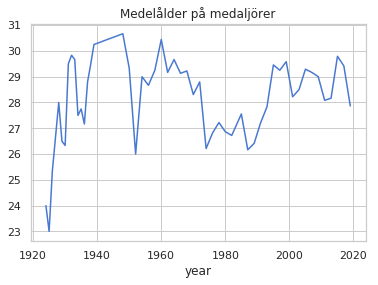

In [89]:

df_medalist.groupby(["year"])["age"].mean().plot(title=u"Medelålder på medaljörer")

In [92]:
df_medalist.groupby(["sex", "Rank"])["age"].mean()

sex     Rank
Ladies  1.0     28.317757
        2.0     28.156863
        3.0     28.742574
Men     1.0     27.988506
        2.0     28.695946
        3.0     28.181159
Name: age, dtype: float64

In [94]:
df_medalist.set_index("Athlete")[["year", "race", "age", "Rank"]].sort_values("age", ascending=False).head(10)

year                       race   age  Rank
Athlete                                                             
DE ZOLT Maurilio         1991              Men's 50 km F  41.0   3.0
PEDERSEN Hilde G.        2003  Ladies' SP 1.5 km F Final  39.0   3.0
PEDERSEN Hilde G.        2003            Ladies' 10 km C  39.0   3.0
KOLTSJINA Alevtina       1968               Ladies' 5 km  38.0   3.0
VEERPALU Andrus          2009              Men's 15 km C  38.0   1.0
BAUER Lukas              2015          Men's 50 km C Mst  38.0   2.0
KIRVESNIEMI Marja-Liisa  1993            Ladies' 15 km C  38.0   2.0
KOLTSJINA Alevtina       1968               Ladies' 5 km  38.0   3.0
DE ZOLT Maurilio         1987              Men's 50 km F  37.0   1.0
DI CENTA Giorgio         2009      Men's 30 km M Pursuit  37.0   3.0